# Titanic disaster analysis

In this notevook we use the dataset available at this [link](https://www.kaggle.com/competitions/titanic/data) 

### Column definition
* **`PassengerId`** unique id number to each passenger
* **`Survived`** passenger survive(1) or died(0)
* **`Pclass`** passenger class
* **`Name`** name
* **`Sex`** gender of passenger
* **`Age`** age of passenger
* **`SibS`** number of siblings/spouses
* **`Parch`** number of parents/children
* **`Ticket`** ticket number
* **`Fare`** amount of money spent on ticket
* **`Cabin`** cabin category
* **`Embarked`** port where passenger embarked(C = Cherbourg, Q = Quennstown, S = Southampton


### Content:

* [How many people survived the Titanic disaster?](#1)
* [What was the age distribution of the passengers on board?](#2)
* [How many passengers were men and how many were women?](#3)
* [How many passengers were in each class (1ª, 2ª, 3ª)?](#4)
* [What was the survival rate for each class of passengers?](#5)
* [What was the survival rate for men and women?](#6)
* [What was the distribution of passengers according to boarding city?](#7)
* [What was the distribution of ticket prices?](#8)
* [What was the relationship between age and ticket price?](#9)
* [What is the survival rate for each passenger class, broken down by gender?](#10)
* [What was the average age of surviving passengers compared with those who did not survive?](#11)
* [Correlation between Survived, Pclass and Age](#12)

<hr>

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Show number of NaN values in dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I could replace the missing data in the age column with the average of the ages.
At the moment, for the analyses considered, it does not matter.

In [6]:
# Full name of cities in column 'Embarked'
cherbourg = df['Embarked'] == 'C'
df.loc[cherbourg, 'Embarked'] = 'Cherbourg'

queenstown = df['Embarked'] == 'Q'
df.loc[queenstown, 'Embarked'] = 'Queenstown'

southampton = df['Embarked'] == 'S'
df.loc[southampton, 'Embarked'] = 'Southampton'

In [7]:
df['Embarked'].head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Embarked, dtype: object

<a id = "1"></a>
#### How many people survived the Titanic disaster?

In [8]:
num_survived = (df['Survived'] == 1).sum()
print('Number of passengers survived:', num_survived)

Number of passengers survived: 342


<a id = "2"></a>
#### What was the age distribution of the passengers on board?

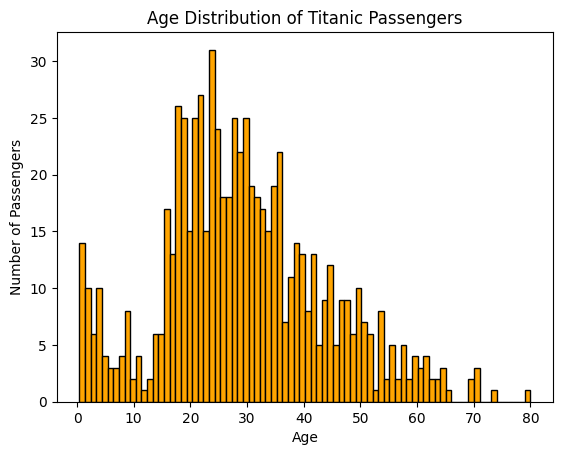

In [9]:
plt.hist(df['Age'], bins=80, edgecolor='k', color='orange')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

<a id = "3"></a>
#### How many passengers were men and how many were women?

In [10]:
total_male = (df['Sex'] == 'male').sum()
total_female = (df['Sex'] == 'female').sum()

print('Number of male passengers on board:', total_male)
print('Number of female passengers on board:', total_female)

Number of male passengers on board: 577
Number of female passengers on board: 314


Text(0.5, 1.0, 'Percentage of male and female on board')

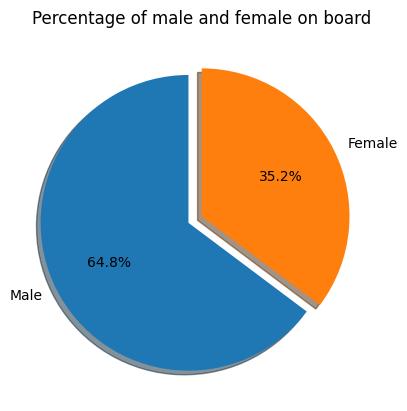

In [11]:
plt.pie(
    [total_male, total_female], 
    labels=['Male', 'Female'], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    explode=[0.1, 0]
)
plt.title('Percentage of male and female on board')

<a id = "4"></a>
#### How many passengers were in each class (1ª, 2ª, 3ª)?

In [12]:
total_number_of_first_class_passengers = (df['Pclass'] == 1).sum()
total_number_of_second_class_passengers = (df['Pclass'] == 2).sum()
total_number_of_third_class_passengers = (df['Pclass'] == 3).sum()

print('Number of passengers in first class:', total_number_of_first_class_passengers)
print('Number of passengers in second class:', total_number_of_second_class_passengers)
print('Number of passengers in third class:', total_number_of_third_class_passengers)

Number of passengers in first class: 216
Number of passengers in second class: 184
Number of passengers in third class: 491


Text(0.5, 1.0, 'Percentage of passengers by class')

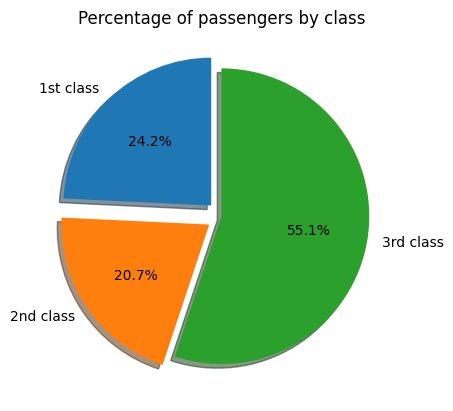

In [13]:
plt.pie(
    [total_number_of_first_class_passengers, total_number_of_second_class_passengers, total_number_of_third_class_passengers], 
    labels=['1st class', '2nd class', '3rd class'], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    explode=[0.1, 0.1, 0]
)

plt.title('Percentage of passengers by class')

<a id = "5"></a>
#### What was the survival rate for each class of passengers?

In [14]:
survival_percentages = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival rate for each class:", survival_percentages)

Survival rate for each class: Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


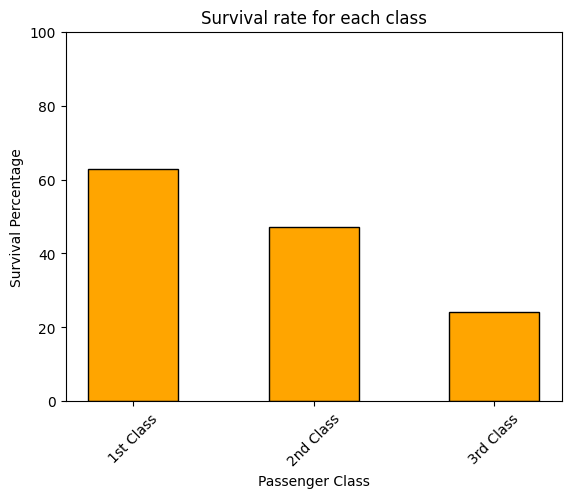

In [15]:
plt.bar(survival_percentages.index, survival_percentages, width=0.5, align='center', edgecolor='black', color='orange')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.title('Survival rate for each class')
plt.xticks(survival_percentages.index, labels=['1st Class', '2nd Class', '3rd Class'], rotation=45)
plt.ylim(0, 100)
plt.show()

<a id = "6"></a>
#### What was the survival rate for men and women?

In [16]:
survival_percentages_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Survival rate by sex:", survival_percentages_by_sex)

Survival rate by sex: Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


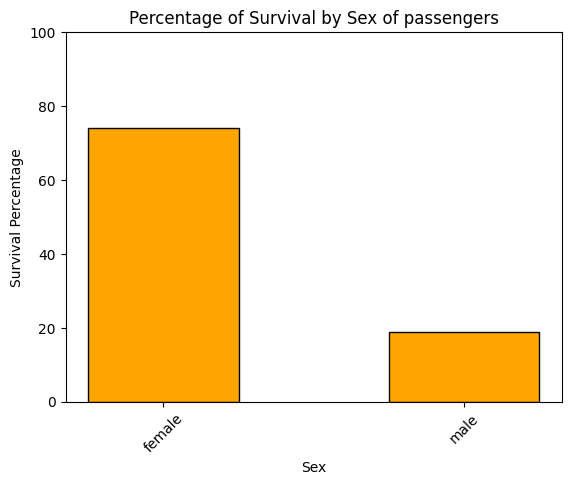

In [17]:
plt.bar(survival_percentages_by_sex.index, survival_percentages_by_sex, width=0.5, align='center', edgecolor='black', color='orange')
plt.xlabel('Sex')
plt.ylabel('Survival Percentage')
plt.title('Percentage of Survival by Sex of passengers')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

<a id = "7"></a>
#### What was the distribution of passengers according to boarding city?

In [18]:
passengers_per_city = df['Embarked'].value_counts()
passengers_per_city

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

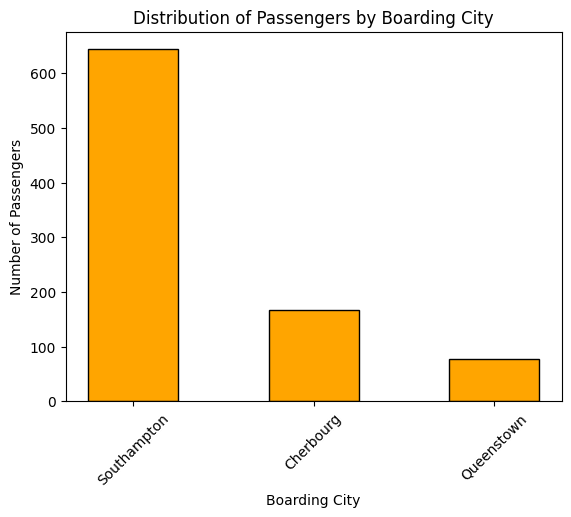

In [19]:
plt.bar(passengers_per_city.index, passengers_per_city, width=0.5, align='center', edgecolor='black', color='orange')
plt.xlabel('Boarding City')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Boarding City')
plt.xticks(rotation=45)
plt.show()

<a id = "8"></a>
#### What was the distribution of ticket prices?

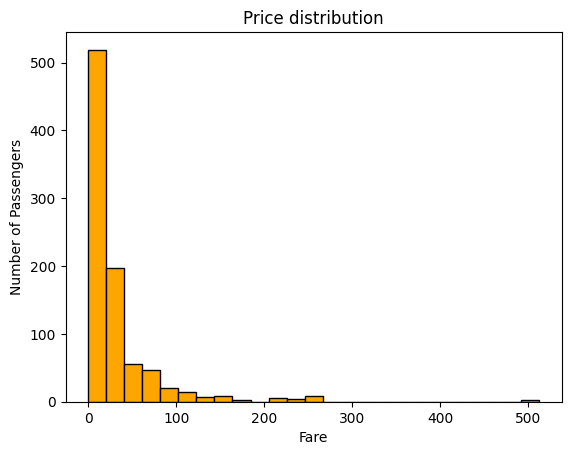

In [20]:
plt.hist(df['Fare'], bins=25, edgecolor='k', color='orange')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Price distribution')
plt.show()

<a id = "9"></a>
#### What was the relationship between age and ticket price?

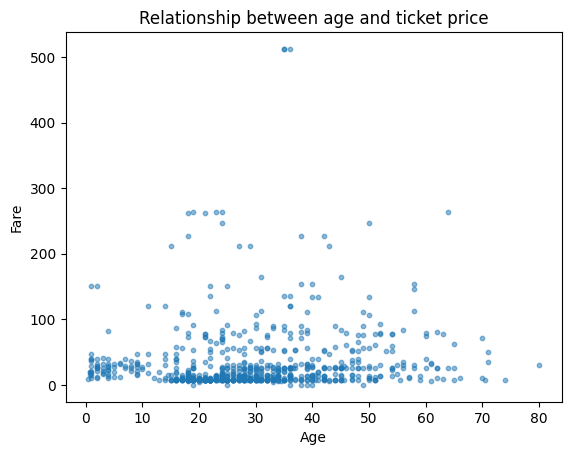

In [21]:
plt.scatter(df['Age'], df['Fare'], s=10, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between age and ticket price')
plt.show()

<a id = "10"></a>
#### What is the survival rate for each passenger class, broken down by gender?

In [22]:
survival_percentages = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
survival_percentages

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

<a id = "11"></a>
#### What was the average age of surviving passengers compared with those who did not survive?

In [23]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print("Average age of survivors:", average_age_survived)
print("Average age of non-survivors:", average_age_not_survived)

Average age of survivors: 28.343689655172415
Average age of non-survivors: 30.62617924528302


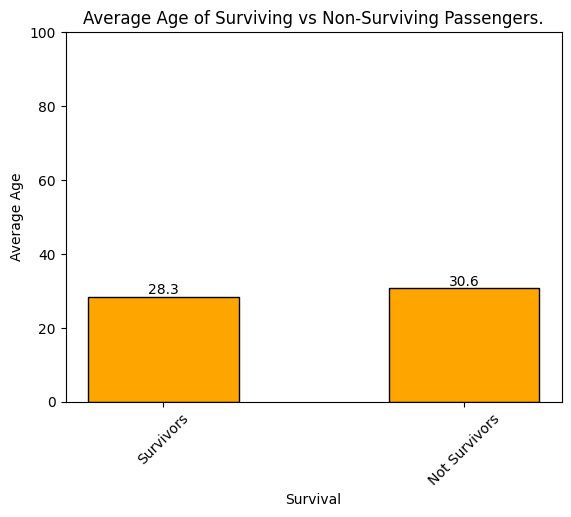

In [24]:
labels = ['Survivors', 'Not Survivors']
mean_ages = [average_age_survived, average_age_not_survived]

plt.bar(labels, mean_ages, width=0.5, align='center', edgecolor='black', color='orange')

for i, v in enumerate(mean_ages):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.xlabel('Survival')
plt.ylabel('Average Age')
plt.ylim(0,100)
plt.title('Average Age of Surviving vs Non-Surviving Passengers.')
plt.xticks(rotation=45)
plt.show()

<a id = "12"></a>
#### Correlation between Survived, Pclass and Age

<AxesSubplot: >

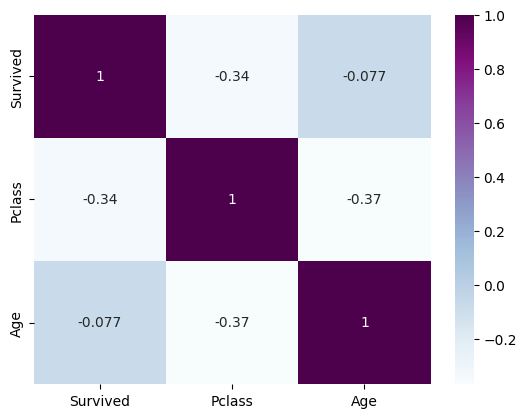

In [25]:
columns = [ 'Survived', 'Pclass','Age']
sns.heatmap(df[columns].corr(), annot=True, cmap='BuPu')